In [0]:
!curl https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz --output data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  20.6M      0  0:00:03  0:00:03 --:--:-- 20.6M


In [0]:
!tar xf data


In [0]:
import glob

from keras.preprocessing.text import text_to_word_sequence
from string import  punctuation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers import LSTM


def read_file(file):
    f=open(file)
    try:
        text = f.read()
    except:
        text =  None
    finally:
        f.close()

    return text

def clean_text(text):
    text = text.lower()
    text = re.sub(re.compile('<.*?>'), '', text)
    text = text.translate(str.maketrans('', '', punctuation))
    return text

positive_files = glob.glob('./aclImdb/train/pos/*.txt')
positive_reviews_list = []
for file in positive_files:
    text = read_file(file)
    if text:
        positive_reviews_list.append(text)
negative_files = glob.glob('./aclImdb/train/neg/*.txt')
negative_reviews_list = []
for file in negative_files:
    text = read_file(file)
    if text:
        negative_reviews_list.append(clean_text(text))

t = Tokenizer()
t.fit_on_texts(positive_reviews_list + negative_reviews_list)


X = t.texts_to_sequences(positive_reviews_list + negative_reviews_list)

y = [1]*len(positive_reviews_list) + [0]*len(negative_reviews_list)

x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True)

x_train = sequence.pad_sequences(x_train, maxlen=80)
x_val = sequence.pad_sequences(x_val, maxlen=80)
positive_files = glob.glob('./aclImdb/test/pos/*.txt')
positive_reviews_list = []
for file in positive_files:
    text = read_file(file)
    if text:
        positive_reviews_list.append(text)

negative_files = glob.glob('./aclImdb/test/neg/*.txt')
negative_reviews_list = []
for file in negative_files:
    text = read_file(file)
    if text:
        negative_reviews_list.append(clean_text(text))

y_test = [1]*len(positive_reviews_list) + [0]*len(negative_reviews_list)
x_test = t.texts_to_sequences(positive_reviews_list + negative_reviews_list)
x_test = sequence.pad_sequences(x_test, maxlen=80)



In [0]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('Train...')

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=7,
          validation_data=(x_val, y_val))

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/7
20000/20000 [==============================] - 122s 6ms/step - loss: 0.2937 - accuracy: 0.8824 - val_loss: 0.1932 - val_accuracy: 0.9234
Epoch 2/7
20000/20000 [==============================] - 121s 6ms/step - loss: 0.1071 - accuracy: 0.9629 - val_loss: 0.1674 - val_accuracy: 0.9424
Epoch 3/7
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0626 - accuracy: 0.9799 - val_loss: 0.1767 - val_accuracy: 0.9438
Epoch 4/7
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.1863 - val_accuracy: 0.9462
Epoch 5/7
20000/20000 [==============================] - 120s 6ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.2212 - val_accuracy: 0.9492
Epoch 6/7
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.2150 - val_accuracy: 0.9344
Epoch 7/7
20000/20000 [==============================] - 119s 6ms/ste

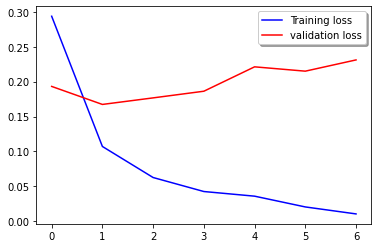

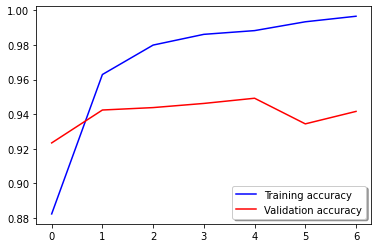

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [0]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
acc

25000/25000 [==============================] - 13s 513us/step


0.9348800182342529

In [0]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu' ))
model.add(Dense(32, activation='relu' ))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=15,
          validation_data=(x_val, y_val))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
acc

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 250s 12ms/step - loss: 0.2736 - accuracy: 0.8822 - val_loss: 0.1980 - val_accuracy: 0.9218
Epoch 2/15
20000/20000 [==============================] - 247s 12ms/step - loss: 0.1134 - accuracy: 0.9615 - val_loss: 0.1742 - val_accuracy: 0.9366
Epoch 3/15
20000/20000 [==============================] - 247s 12ms/step - loss: 0.0890 - accuracy: 0.9713 - val_loss: 0.1621 - val_accuracy: 0.9398
Epoch 4/15
20000/20000 [==============================] - 250s 13ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.2175 - val_accuracy: 0.9392
Epoch 5/15
20000/20000 [==============================] - 250s 12ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.2194 - val_accuracy: 0.9384
Epoch 6/15
20000/20000 [==============================] - 251s 13ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.2968 - val_accuracy: 0.9338
Epoch 7/15
20000/20000 [==============================] -

0.9314799904823303

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,753,473
Trainable params: 2,753,473
Non-trainable params: 0
____________________________________________

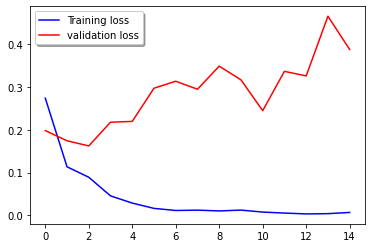

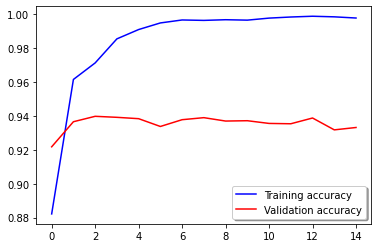

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [0]:
!wget  http://nlp.stanford.edu/data/glove.6B.zip 


--2020-04-14 16:41:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-04-14 16:41:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-04-14 16:41:52--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
word_index = t.word_index
import numpy as np
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
num_words = min(20000, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, 100))
for word, i in word_index.items():
    if i >= 20000:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
model = Sequential()
from keras.initializers import Constant
model.add(Embedding(20000,100,embeddings_initializer=Constant(embedding_matrix),input_length=1000,trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_val, y_val))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=128)
acc

Train...
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1308s 65ms/step - loss: 0.3291 - accuracy: 0.8601 - val_loss: 0.2106 - val_accuracy: 0.9090
Epoch 2/10
 5888/20000 [=======>......................] - ETA: 15:13 - loss: 0.2221 - accuracy: 0.9057

KeyboardInterrupt: ignored

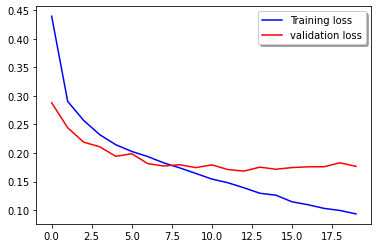

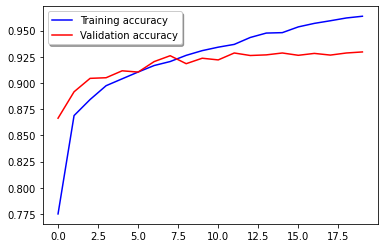

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()